In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)

# Read the City and Ride Data
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")


# Combine the data into a single dataset
combined_df = pd.merge(city_df, ride_df, on='city', how='outer')
# Display the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

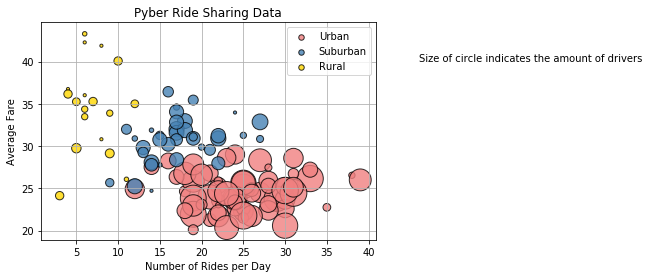

In [46]:
# Obtain the x and y coordinates for each of the three city types
urban_df = combined_df.loc[combined_df['type'] == 'Urban']
suburban_df = combined_df.loc[combined_df['type'] == 'Suburban']
rural_df = combined_df.loc[combined_df['type'] == 'Rural']

urban_rides = urban_df['city'].value_counts().sort_index().tolist()
suburban_rides = suburban_df['city'].value_counts().sort_index().tolist()
rural_rides = rural_df['city'].value_counts().sort_index().tolist()

urban_fare = urban_df.groupby(['type', 'city']).mean().fare.tolist()
suburban_fare = suburban_df.groupby(['type', 'city']).mean().fare.tolist()
rural_fare = rural_df.groupby(['type', 'city']).mean().fare.tolist()

urban_dcount = urban_df.groupby(['type', 'city']).mean().driver_count.tolist()
suburban_dcount = suburban_df.groupby(['type', 'city']).mean().driver_count.tolist()
rural_dcount = rural_df.groupby(['type', 'city']).mean().driver_count.tolist()

# Build the scatter plots for each city types
fig, ax = plt.subplots()

ax.scatter(urban_rides, urban_fare, s=[value * 10 for value in urban_dcount], color='lightcoral', alpha=.8, edgecolor='black',
           label='Urban')
ax.scatter(suburban_rides, suburban_fare, s=[value * 10 for value in suburban_dcount], color= 'steelblue', alpha=.8, edgecolor='black',
          label='Suburban')
ax.scatter(rural_rides, rural_fare, s=[value * 10 for value in rural_dcount], color='gold', alpha=.8, edgecolor='black',
          label='Rural')

# Incorporate the other graph properties
plt.grid()
# Create a legend
lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.xlabel('Number of Rides per Day')
plt.ylabel('Average Fare')
plt.title('Pyber Ride Sharing Data')
plt.text(46,40,'Size of circle indicates the amount of drivers')
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig('pyber')

In [3]:
#sizze = [value * 10 for value in urban_dcount]

In [ ]:
#urban_df.groupby(['type', 'city']).mean()

In [48]:

urban_df.fare.sum()

39854.380000000005

In [5]:
# Show plot
plt.show()

## Total Fares by City Type

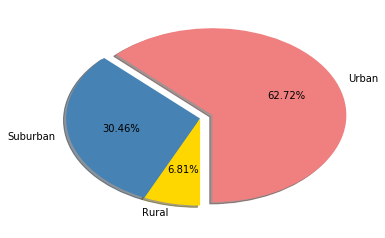

In [81]:
# Calculate Type Percents
percents = [urban_df.fare.sum() / combined_df.fare.sum(), suburban_df.fare.sum() / combined_df.fare.sum(),
           rural_df.fare.sum() / combined_df.fare.sum()]

piecolors = ['lightcoral', 'steelblue', 'gold']
pielabels = ['Urban', 'Suburban', 'Rural']
plt.pie(percents, labels=pielabels, colors= piecolors, explode=[.1,0,0], startangle=270, shadow=True, autopct = '%.2f%%')


# Build Pie Chart

# Save Figure
plt.savefig('pyber pie')

In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

([<matplotlib.patches.Wedge at 0x21315c0a630>,
 [Text(1.0046,0.656338,'Urban'),
  Text(-1.00735,-0.441865,'Suburban'),
  Text(-0.181054,-1.085,'Rural')],
 [Text(0.586017,0.382864,'68.42%'),
  Text(-0.549464,-0.241017,'26.32%'),
  Text(-0.0987567,-0.591817,'5.26%')])

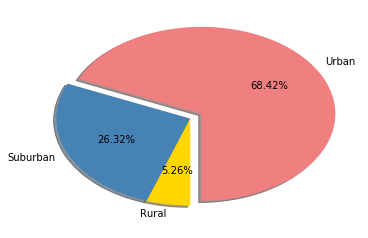

In [80]:
# Calculate Ride Percents
ride_percents = [urban_df.city.count() / combined_df.city.count(), suburban_df.city.count() / combined_df.city.count(),
                rural_df.city.count() / combined_df.city.count()]
# Build Pie Chart
plt.pie(ride_percents, labels=pielabels, colors= piecolors, explode=[.1,0,0], startangle=270, shadow=True, autopct = '%.2f%%')
# Save Figure


In [67]:
urban_df.city.count()

1625

In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

([<matplotlib.patches.Wedge at 0x21315de5358>,
 [Text(0.677779,0.99026,'Urban'),
  Text(-0.693922,-0.853506,'Suburban'),
  Text(-0.0905629,-1.09627,'Rural')],
 [Text(0.395371,0.577652,'80.89%'),
  Text(-0.378503,-0.465549,'16.48%'),
  Text(-0.0493979,-0.597963,'2.62%')])

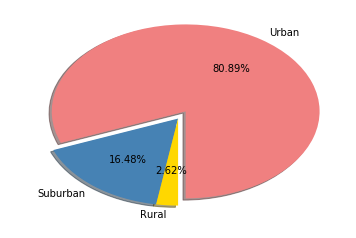

In [87]:
# Calculate Driver Percents
total_dcount = sum(urban_dcount) + sum(suburban_dcount) + sum(rural_dcount)

driver_percents = [sum(urban_dcount) / total_dcount, sum(suburban_dcount) / total_dcount, sum(rural_dcount) / total_dcount]
# Build Pie Charts
plt.pie(driver_percents, labels=pielabels, colors= piecolors, explode=[.1,0,0], startangle=270, shadow=True, autopct = '%.2f%%')
# Save Figure


In [11]:
# Show Figure
plt.show()

[12.0,
 26.0,
 52.0,
 41.0,
 49.0,
 65.0,
 37.0,
 61.0,
 37.0,
 36.0,
 64.0,
 27.0,
 39.0,
 39.0,
 22.0,
 5.0,
 19.0,
 5.0,
 58.0,
 17.0,
 69.0,
 23.0,
 25.0,
 50.0,
 33.0,
 44.0,
 44.0,
 18.0,
 33.0,
 6.0,
 19.0,
 22.0,
 59.0,
 67.0,
 7.0,
 23.0,
 3.0,
 57.0,
 11.0,
 67.0,
 38.0,
 47.0,
 12.0,
 34.0,
 25.0,
 64.0,
 21.0,
 11.0,
 46.0,
 4.0,
 10.0,
 72.0,
 38.0,
 45.0,
 48.0,
 70.0,
 32.0,
 25.0,
 57.0,
 28.0,
 45.0,
 25.0,
 39.0,
 73.0,
 59.0,
 46.0]